<a href="https://colab.research.google.com/github/Ruchintha-Dias/Accounting-and-Finance-for-Business/blob/main/Test_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

Test.csv

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

This code imports libraries for data handling (pandas, numpy), visualisation (matplotlib, seaborn , plotly), machine learning preprocessing (sklearn.preprocessing), and text processing (re). It is likely for data analysis, visualization, and preprocessing before modeling.

In [ ]:
# load traincsv dataset
import pandas as pd
df = pd.read_csv("test.csv")
df.head()

Customer_ID outlet_city luxury_sales fresh_sales dry_sales
0        33574  batticaloa       2686.5        3582     12537
1        10089  batticaloa      1717.56     2576.34   9446.58
2        38329  batticaloa       854.04     1242.24   5201.88
3        11376  batticaloa      1638.12     2320.67   9282.68
4        12410  batticaloa      1039.09     1518.67   5435.24

Loading the CSV file into a Pandas DataFrame and displyas its first five rows.

In [ ]:
# Identify dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# List down dataset columns
list(df.columns)

['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales']

In [ ]:
# Get dataset dimmentions
shape_before_preprocessing = df.shape
shape_before_preprocessing

(40749, 5)

40749 rows and 5 columns were identified in the DataFrame before preprocessing.

In [ ]:
#Get summery statistics for numerics
df.describe()

Customer_ID
count  40749.000000
mean   20375.000000
std    11763.367396
min        1.000000
25%    10188.000000
50%    20375.000000
75%    30562.000000
max    40749.000000

In [ ]:
#Getting summery statistics for objects
df.describe(include='object')

outlet_city luxury_sales fresh_sales dry_sales
count        40749        40749       40749     40749
unique          27        33183       36100     35771
top         Jaffna       1801.8      1161.6    2694.6
freq          2226            7           5         5

In [ ]:
# Get unique values in columns in a ascending order
for col in df.columns:
    unique_values = df[col].unique()
    sorted_values = sorted(unique_values, key=lambda x: str(x))  # This ensures mixed data types sort without any errors
    print(f"Unique values in {col}: {sorted_values}\n")

Unique values in Customer_ID: [np.int64(1), np.int64(10), np.int64(100), np.int64(1000), np.int64(10000), np.int64(10001), np.int64(10002), np.int64(10003), np.int64(10004), np.int64(10005), np.int64(10006), np.int64(10007), np.int64(10008), np.int64(10009), np.int64(1001), np.int64(10010), np.int64(10011), np.int64(10012), np.int64(10013), np.int64(10014), np.int64(10015), np.int64(10016), np.int64(10017), np.int64(10018), np.int64(10019), np.int64(1002), np.int64(10020), np.int64(10021), np.int64(10022), np.int64(10023), np.int64(10024), np.int64(10025), np.int64(10026), np.int64(10027), np.int64(10028), np.int64(10029), np.int64(1003), np.int64(10030), np.int64(10031), np.int64(10032), np.int64(10033), np.int64(10034), np.int64(10035), np.int64(10036), np.int64(10037), np.int64(10038), np.int64(10039), np.int64(1004), np.int64(10040), np.int64(10041), np.int64(10042), np.int64(10043), np.int64(10044), np.int64(10045), np.int64(10046), np.int64(10047), np.int64(10048), np.int64(10049

In [ ]:
# Identify number of missing values
df.isnull().sum()

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64

In [ ]:
# Identify number of missing values as a percentage
df.isna().sum()/len(df)*100

Customer_ID     0.0
outlet_city     0.0
luxury_sales    0.0
fresh_sales     0.0
dry_sales       0.0
dtype: float64

Identifying the missing values by 'isna()' function and its percentage and no missing values were found in the dataset.

In [ ]:
# Observe number of duplicated values
df.duplicated().sum()

np.int64(0)

Identifying the number of duplicates in the dataset and no duplicates were found.

## Data Preprocessing

In [ ]:
# Capitalising first letters of values in outlet_city
df['outlet_city'] = df['outlet_city'].str.title()

In [ ]:
# Replacing corrected outlet_city name
df['outlet_city'] = df['outlet_city'].replace('Trincomale', 'Trincomalee')

In [ ]:
# Removing spaces in column values
columns_to_clean = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Convert columns to string type before applying str.replace
for col in columns_to_clean:
    df[col] = df[col].astype(str)

df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.replace(' ', '', regex=True))

using this code removed spaces from the values in 'luxury_sales', 'fresh_sales' and'dry_sales' columns. Ensures that all values in these columns are converted to string before applying string operations and also ensures the inconsistent formating.

In [ ]:
import re

# Extract rows where the 'luxury_sales' column contains strings
strings_in_luxury_sales = df['luxury_sales'][df['luxury_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

luxury_sales
SevenHundreadandsixtyRuppees     1
EightHundreadandfifteenruppes    1
Name: count, dtype: int64

In [ ]:
import re

# Extract rows where the 'fresh_sales' column contains strings
strings_in_luxury_sales = df['fresh_sales'][df['fresh_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

fresh_sales
Ninethousandruppess    1
Name: count, dtype: int64

In [ ]:
import re

# Extract rows where the 'dry_sales' column contains strings
strings_in_luxury_sales = df['dry_sales'][df['dry_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

dry_sales
ThreeThousandsevenhundreadruppees    1
Name: count, dtype: int64

After removing the spaces, above codes detect data entry errors where text values exist in a column expected to contain numeric values.

In [ ]:
# Remove string values and symbols
df.replace({'SevenHundreadandsixtyRuppees': 760,
            'EightHundreadandfifteenruppes': 815,
            'Ninethousandruppess': 19000,
            'ThreeThousandsevenhundreadruppees': 3700}, inplace=True)

Using this code replaced the identified text values with their numeric equivalents.

In [ ]:
# Change data types
df['luxury_sales'] = df['luxury_sales'].astype('float')
df['fresh_sales'] = df['fresh_sales'].astype('float')
df['dry_sales'] = df['dry_sales'].astype('float')

Converting the data types of 'luxury_sales', 'fresh_sales' and 'dry_sales'columns in object to float for performing numeric operations, accurate analysis and modeling.

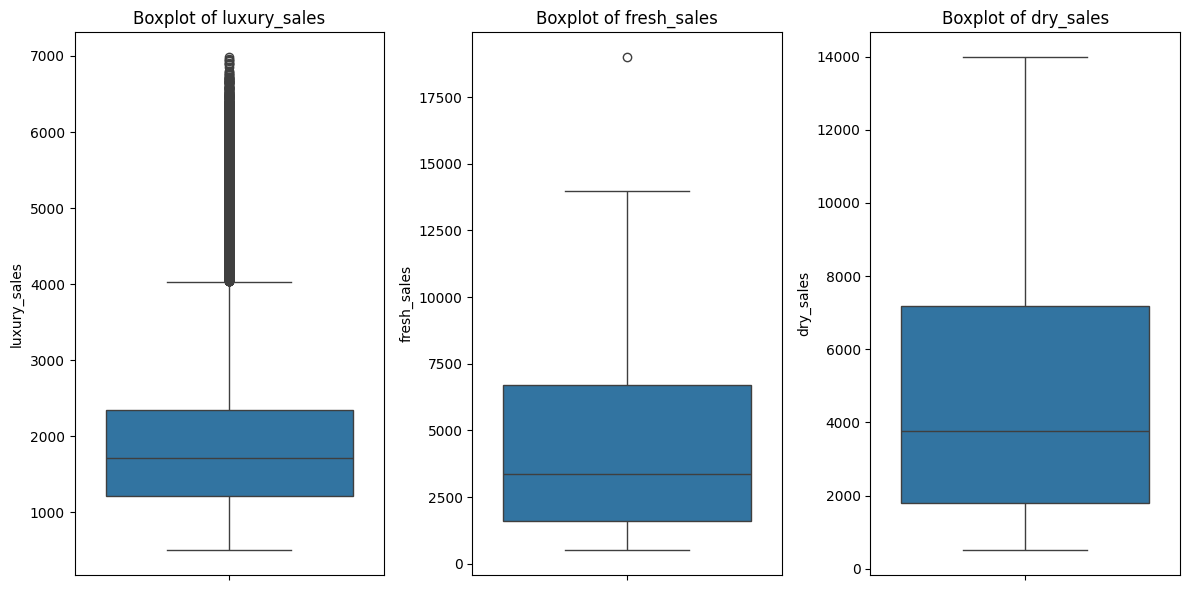

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the column name in the list
columns_to_check = ["luxury_sales", "fresh_sales", "dry_sales"]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create boxplots
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

creating box plots to visualize the outliers in 'luxury_sales','fresh_sales' and ,'dry_sales' columns and olutliers were found in 'luxury_sales' and 'fresh_sales' columns.

In [ ]:
# Outllier detection function
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

The code use IQR method into a fuction to detect outlier values that fall beyond 1.5 times the IQR from the first (Q1) and third (Q3) quartiles

In [ ]:
# Detect outliers in luxury_sales with outllier detection function
ls_outliers = find_outliers_IQR(df['luxury_sales'])
print("number of outliers: "+ str(len(ls_outliers)))
ls_outliers

number of outliers: 1841


1867     5516.94
1876     5272.74
1878     4911.00
1884     4597.44
1886     4428.50
          ...   
40736    4388.04
40737    4261.29
40739    4103.12
40747    4313.76
40748    4212.16
Name: luxury_sales, Length: 1841, dtype: float64

The code use outlier fuction to detect outliers in luxury_sales column. The output shows that ther are 1841 number of outliers

In [ ]:
# Sort outliers in luxury_sales with ascending order
sorted_outliers = ls_outliers.sort_values()
sorted_outliers.unique()

array([4035.52, 4037.25, 4038.37, ..., 6946.1 , 6956.25, 6985.65])

Luxury goods are normally higher prized than fresh goods and dry goods, it is possible to have higher values in luxury_sales. Therefore let's not consider these values as outliers.

In [ ]:
# Detect outliers in fresh_sales with outllier detection function
outliers = find_outliers_IQR(df['fresh_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 1


13949    19000.0
Name: fresh_sales, dtype: float64

Outliers in freash_sales need to be cleared since generally freash sales have not high values.

In [ ]:
# Detect outliers in dry_sales with outllier detection function
outliers = find_outliers_IQR(df['dry_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


Series([], Name: dry_sales, dtype: float64)

The code use outlier fuction to detect outliers in dry_sales column. And output shows that there is no outliers.

In [ ]:
# Remove outliers
df.drop(df.index[[13949]], inplace=True)

the Identified olutlier in fresh_sales was removed since generally fresh sales are not in high values.

In [ ]:
# Get dataset dimmentions before preprocessing
shape_before_preprocessing

(40749, 5)

The code shows the dimentions of the dataset before the prepossing and there were 40749 rows and 5 columns in the dataset.

In [ ]:
# Get dataset dimmentions after preprocessing
shape_after_preprocessing = df.shape
shape_after_preprocessing

(40748, 5)

The code shows the dimentions of the dataset after the prepossing and there are 40748 rows and 5 columns in the dataset.

## Prepared Train Dataset

In [ ]:
# Save cleaned dataframe to csv
try:
  df.to_csv('cleaned_test.csv', index=False)
  print('cleaned_test.csv saved successfully')
except Exception as e:
  print(f"An error occurred: {e}")

cleaned_test.csv saved successfully


The code will save the dataframe after the preprocessing into a new dataset named cleaned_testcsv.csv. Try and except used to inform completion of the task and errors occured in the task.

## EDA

### Univariate Analysis

#### Descriptive measures for categorical variables

In [ ]:
# Number of customers in each outlet city
df.value_counts(subset = df.outlet_city)

outlet_city
Kalmunai                  2233
Jaffna                    2225
Gampaha                   2198
Katunayake                2157
Negombo                   2129
Batticaloa                2119
Kandy                     2101
Colombo                   2092
Peliyagoda                2041
Dehiwala-Mount Lavinia    1981
Nuwara Eliya              1963
Kaduwela                  1943
Wattala                   1938
Kelaniya                  1934
Homagama                  1930
Moratuwa                  1903
Trincomale                1814
Panadura                  1810
Anuradhapura              1645
Madawachiya               1499
Galle                      456
Kotte                      379
Trincomalee                258
Name: count, dtype: int64

This code count the number of customers in each outlet_city

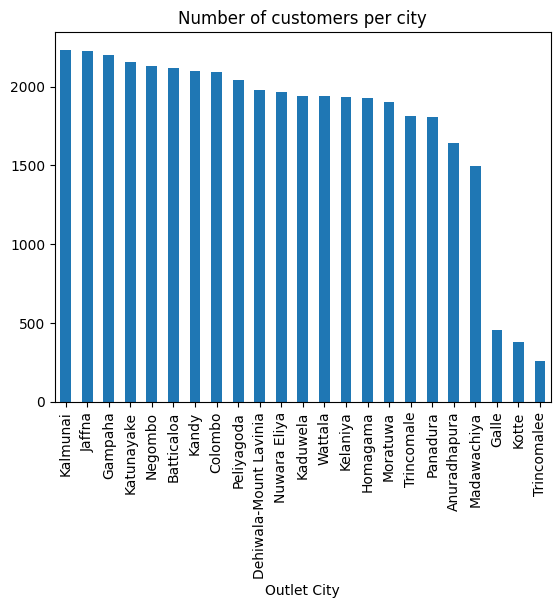

In [ ]:
# Create a bar graph
df['outlet_city'].value_counts().plot(kind='bar')
plt.title('Number of customers per city')
plt.xlabel('Outlet City')
plt.show()

The code plot a bar graph. This bar graph shows the number of customers for each city outlet. The highest number of customers are reported in the jaffna outlet. Lowest is reported in peliyagoda. All the outlets have above 202 customers

#### Descriptive measures for numerical variables

In [ ]:
# Check the statistical analysis
df.describe()

Customer_ID  luxury_sales   fresh_sales     dry_sales
count  40748.000000  40748.000000  40748.000000  40748.000000
mean   20374.796628   1927.061412   4442.858007   4691.586975
std    11763.440104   1003.808492   3349.403771   3410.986334
min        1.000000    500.800000    500.300000    500.900000
25%    10187.750000   1220.345000   1619.547500   1799.520000
50%    20374.500000   1721.710000   3369.030000   3755.345000
75%    30562.250000   2346.132500   6696.997500   7183.460000
max    40749.000000   6985.650000  13995.100000  13989.500000

The df.describe() function provides a summary of numerical statistics for each column in the dataset.

In [ ]:
Numerical_columns = ('luxury_sales', 'fresh_sales', 'dry_sales')

# Generate histograms
for col in Numerical_columns:
  col = px.histogram(df, x = col)
  col.show()

This code plot a histogram for luxury_sales, fresh_sales and dry_sales. By Looking at these histograms, All three histograms are right skewed. Also most values are concentrated on the left side of the histogram.

In [ ]:
Numerical_columns = ('luxury_sales', 'fresh_sales', 'dry_sales')

# Generate box plots
for col in Numerical_columns:
  col = px.box(df, x = col)
  col.show()

### Multivariate Analysis

#### Categorical - Numerical

In [ ]:
# Create a pivot table
pd.pivot_table(df, values='luxury_sales', index='outlet_city', aggfunc=np.mean)

<ipython-input-34-e447125513e9>:2: FutureWarning:

The provided callable <function mean at 0x7bb0c8bc93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



luxury_sales
outlet_city                         
Anuradhapura             1789.050723
Batticaloa               2168.390335
Colombo                  2108.621133
Dehiwala-Mount Lavinia   1712.505835
Galle                    3147.413443
Gampaha                  2091.913785
Homagama                 1691.019959
Jaffna                   2120.683748
Kaduwela                 1704.729022
Kalmunai                 2157.405034
Kandy                    2189.333417
Katunayake               2131.675220
Kelaniya                 1708.546934
Kotte                    2374.282032
Madawachiya              1547.535110
Moratuwa                 1706.746968
Negombo                  2099.521071
Nuwara Eliya             1736.769791
Panadura                 1695.882735
Peliyagoda               1705.977021
Trincomale               1856.470579
Trincomalee              3850.102713
Wattala                  1690.355991

In [ ]:
# Create a pivot table
pd.pivot_table(df, values='fresh_sales', index='outlet_city', aggfunc=np.mean)

<ipython-input-35-ff1a281651d0>:2: FutureWarning:

The provided callable <function mean at 0x7bb0c8bc93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



fresh_sales
outlet_city                        
Anuradhapura            4568.640948
Batticaloa              5218.438764
Colombo                 5000.204828
Dehiwala-Mount Lavinia  3786.805411
Galle                   5888.338794
Gampaha                 5077.812953
Homagama                3894.984321
Jaffna                  5041.976562
Kaduwela                3700.554931
Kalmunai                4943.223144
Kandy                   5124.111656
Katunayake              4915.102248
Kelaniya                3816.103475
Kotte                   4693.787916
Madawachiya             3539.413736
Moratuwa                3887.199338
Negombo                 4951.429962
Nuwara Eliya            3839.854982
Panadura                3746.048398
Peliyagoda              3939.280416
Trincomale              5161.071654
Trincomalee             4532.686085
Wattala                 3627.895986

In [ ]:
# Create a pivot table
pd.pivot_table(df, values='dry_sales', index='outlet_city', aggfunc=np.mean)

<ipython-input-36-7fb66274deda>:2: FutureWarning:

The provided callable <function mean at 0x7bb0c8bc93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



dry_sales
outlet_city                        
Anuradhapura            5741.289295
Batticaloa              5012.771520
Colombo                 5024.919575
Dehiwala-Mount Lavinia  4298.519435
Galle                   2883.869408
Gampaha                 4842.546679
Homagama                4161.546565
Jaffna                  5108.841560
Kaduwela                4331.454601
Kalmunai                5375.372342
Kandy                   4978.234274
Katunayake              5056.932091
Kelaniya                4298.377771
Kotte                   2585.679974
Madawachiya             4700.230120
Moratuwa                4262.165544
Negombo                 5105.101249
Nuwara Eliya            4349.211844
Panadura                4266.791508
Peliyagoda              4221.776614
Trincomale              5147.382762
Trincomalee             3787.939612
Wattala                 4347.040526

#### Numerical - Numerical

In [ ]:
#Generate scatter plots
import plotly.express as px

# Generating scatter plots with titles
fig1 = px.scatter(x=df['luxury_sales'], y=df['fresh_sales'])
fig1.update_layout(title="Luxury Sales vs Fresh Sales", xaxis_title="Luxury Sales", yaxis_title="Fresh Sales")
fig1.show()

fig2 = px.scatter(x=df['luxury_sales'], y=df['dry_sales'])
fig2.update_layout(title="Luxury Sales vs Dry Sales", xaxis_title="Luxury Sales", yaxis_title="Dry Sales")
fig2.show()

fig3 = px.scatter(x=df['fresh_sales'], y=df['dry_sales'])
fig3.update_layout(title="Fresh Sales vs Dry Sales", xaxis_title="Fresh Sales", yaxis_title="Dry Sales")
fig3.show()

The code create a scatter plot between luxury_sales, fresh_sales and dry_sales.

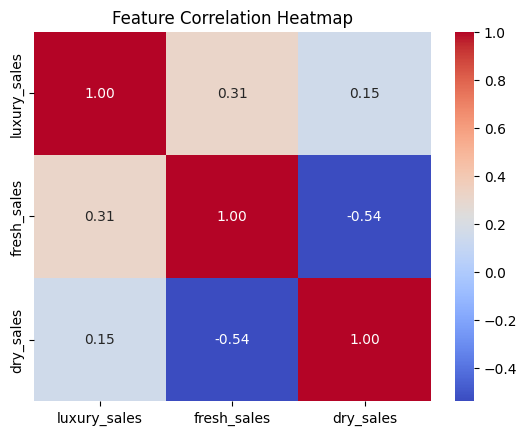

In [ ]:
Numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Correlation Heatmap
sns.heatmap(df[Numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The code creates a correlation heatmap for luxury_sales, fresh_sales and dry_sales. fresh_sales and dry_sales have slightly negative correlation.

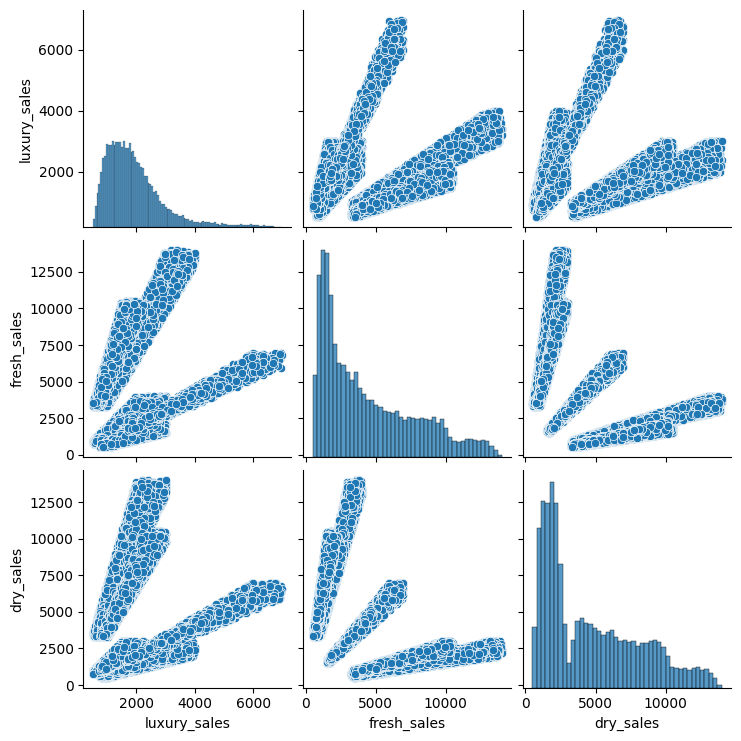

In [ ]:
Numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Pairplot for feature relationships
sns.pairplot(df[Numerical_columns])
plt.show()

This code creates a pair plot (scatter matrix) to visualizes the relationships between Luxury Sales, Fresh Sales and Dry Sales by showing scatter plots for each pair of variables along with histograms of individual distributions.

For the plots,

Luxury vs. Fresh Sales: Displays clustered patterns with multiple linear trends.
Luxury vs. Dry Sales: Similar clustered pattern with clear groupings
Fresh vs. Dry Sales: Shows a distinct pattern with multiple linear clusters.
The Histograms are right skewed.
